<a href="https://colab.research.google.com/github/Lorenzo2626/GSDD-Classification_Project/blob/main/HRC_NN_BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.metrics import confusion_matrix

In [110]:
url = 'https://raw.githubusercontent.com/Lorenzo2626/ClassificationProject/main/hrc_dataset_10K.csv?token=GHSAT0AAAAAABW2VCOVCQWTLRHNJDJI5ANOYW2PHAQ'

dataset = pd.read_csv(url)
dataset.head()

,age,nationality,name_email,zip_code,zip_short,occupation,product_type,industry,income_source,income_range,...,tnc_like_birth,care_of_address,phone_country,phone_tnc_country,ip_tnc_country,nat_tnc_country,su_kyci_day,device_token_no,address,is_fraudster
0,age_32_38,EST,True,10315,10,NaN,STANDARD,NaN,NaN,NaN,...,True,False,EST,True,True,True,0-2,NaN,Tallinn,True
1,age_25_31,FRA,True,10000,10,PENSIONER,NaN,NaN,GOVERNMENT_PAYMENTS,NaN,...,True,False,FRA,True,True,True,0-2,1,Troyes,True
2,age_46_52,ITA,False,80056,80,ITA_EMPLOYEE_PUBLIC_SECTOR,NaN,NaN,SALARY,NaN,...,True,False,ITA,True,NaN,True,12+,NaN,Ercolano (NA),True
3,age_>60,BEL,False,1030,10,FREELANCER,STANDARD,EDUCATION_AND_SCIENCE,EMPLOYMENT,NaN,...,False,False,FRA,False,False,True,0-2,2,Brussels,True
4,age_18_24,ZAF,False,D22X0Y0,D2,NaN,STANDARD,NaN,NaN,NaN,...,False,False,IRL,True,True,False,0-2,1,Dublin 22,True


In [111]:
data = dataset.copy()

In [112]:
data.head()

,age,nationality,name_email,zip_code,zip_short,occupation,product_type,industry,income_source,income_range,...,tnc_like_birth,care_of_address,phone_country,phone_tnc_country,ip_tnc_country,nat_tnc_country,su_kyci_day,device_token_no,address,is_fraudster
0,age_32_38,EST,True,10315,10,NaN,STANDARD,NaN,NaN,NaN,...,True,False,EST,True,True,True,0-2,NaN,Tallinn,True
1,age_25_31,FRA,True,10000,10,PENSIONER,NaN,NaN,GOVERNMENT_PAYMENTS,NaN,...,True,False,FRA,True,True,True,0-2,1,Troyes,True
2,age_46_52,ITA,False,80056,80,ITA_EMPLOYEE_PUBLIC_SECTOR,NaN,NaN,SALARY,NaN,...,True,False,ITA,True,NaN,True,12+,NaN,Ercolano (NA),True
3,age_>60,BEL,False,1030,10,FREELANCER,STANDARD,EDUCATION_AND_SCIENCE,EMPLOYMENT,NaN,...,False,False,FRA,False,False,True,0-2,2,Brussels,True
4,age_18_24,ZAF,False,D22X0Y0,D2,NaN,STANDARD,NaN,NaN,NaN,...,False,False,IRL,True,True,False,0-2,1,Dublin 22,True


In [113]:
# data = data.astype({"name_email": str})
# data = data.astype({"tnc_like_birth": str})
# data = data.astype({"care_of_address": str})
# data = data.astype({"phone_tnc_country": str})
# data = data.astype({"ip_tnc_country": str})
# data = data.astype({"nat_tnc_country": str})
# data = data.astype({"pep": str})
# data = data.astype({"phone_country_unsupported": str})
# data = data.astype({"is_fraudster": str})

In [114]:
for k in data.columns:
  d = {}
  int_val = 0
  for counter, j in enumerate(data[k]):
      if not j in d.keys():
          d[j] = int_val
          int_val = int_val + 1
      data[k][counter] = d[j]

data 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,age,nationality,name_email,zip_code,zip_short,occupation,product_type,industry,income_source,income_range,...,tnc_like_birth,care_of_address,phone_country,phone_tnc_country,ip_tnc_country,nat_tnc_country,su_kyci_day,device_token_no,address,is_fraudster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,1,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,2,2,1,2,1,2,1,0,2,0,...,0,0,2,0,1,0,1,0,2,0
3,3,3,1,3,0,3,0,1,3,0,...,1,0,1,1,2,0,0,2,3,0
4,4,4,1,4,2,0,0,0,0,0,...,1,0,3,0,0,1,0,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,4,87,1,9894,130,3,1,10,0,0,...,1,0,1,0,0,1,0,0,8092,1
19996,5,12,0,9895,94,14,1,0,0,0,...,0,0,10,2,1,1,1,0,8093,1
19997,5,29,0,9896,24,0,0,0,0,0,...,0,0,37,0,0,1,1,0,8094,1
19998,4,1,0,1657,31,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1245,1


In [115]:
x = data.drop(['is_fraudster'], axis=1)
y = data['is_fraudster']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)


x_train_new = x_train.to_numpy(dtype = 'float64')
y_train_new = y_train.to_numpy(dtype = 'float64')
x_test_new = x_test.to_numpy(dtype = 'float64')
y_test_new = y_test.to_numpy(dtype = 'float64')

In [123]:
#drops cols
#hot encode

In [116]:
type(y_train_new)

numpy.ndarray

In [117]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_dim=x_train_new.shape[1]))
model.add(Dense(64, activation='sigmoid')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
#model.summary()

In [ ]:
hist = model.fit(x_train_new, y_train_new, validation_data=(x_test_new, y_test_new), epochs=200, batch_size=200)

[]

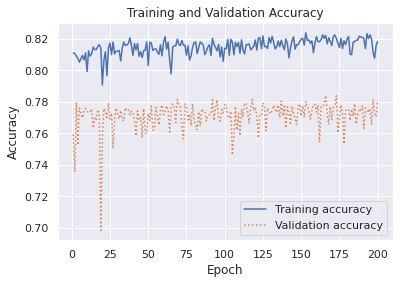

In [121]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

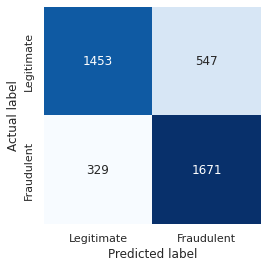

In [122]:
y_predicted = model.predict(x_test_new) > 0.5
mat = confusion_matrix(y_test_new, y_predicted)
labels = ['Legitimate', 'Fraudulent']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')